In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# project modules
import src.wrangle as wr
import src.explore as ex
import src.summaries as s
import src.ts_models_d as tsmd
import src.decomposition as d

from importlib import reload


# makes vizualizations better in a jupyter notebook
%config InlineBackend.figure_format = 'retina'

In [2]:
### start 2014
# common data science libraries
import numpy as np
import pandas as pd

# vizualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
# setting style details for vizualizations
color_pal = sns.color_palette()

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

# project modules
import src.wrangle as wr
import src.summaries as s

start2018_ = wr.get_start2018()
# declaring global variables
df = s.get_summary_df(wr.get_clean_data(start2018=False))
df = wr.drop2017_and_move2016_up(df)
train, test = wr.split_data(df)
validate = test.loc[:'2022-06'].copy() 
test = test.loc['2022-07':]


# create a df with purchase amount by the end of the day only
train_ts = train.purchase_amount.resample('D').sum().to_frame()
# add date features to train_ts for daily data frames and stat tests
train_ts = wr.add_date_features(train_ts)
y_daily = train.purchase_amount.resample('D').sum()
y_weekly = train.purchase_amount.resample('W').sum()
y_monthly = train.purchase_amount.resample('M').sum()

# separate by day for stat test
mon = train_ts[train_ts.day_name == 'Monday']
tue = train_ts[train_ts.day_name == 'Tuesday']
wed = train_ts[train_ts.day_name == 'Wednesday']
thu = train_ts[train_ts.day_name == 'Thursday']
fri = train_ts[train_ts.day_name == 'Friday']
sat = train_ts[train_ts.day_name == 'Saturday']
sun = train_ts[train_ts.day_name == 'Sunday']

# create a df with total purchase amount of the month
train_m = train.purchase_amount.resample('M').sum().to_frame()
# add month name
train_m['month_name'] = train_m.index.month_name()

# create a df with total purchase amount of the month
train_q = train.purchase_amount.resample('3M').sum().to_frame()
# add month name
train_q['month_name'] = train_q.index.month_name()
train_q['quarter'] = train_q.index.quarter

# alpha 0.05 for condidence level 95%
alpha = 0.05

#creating a dataframe for the 'pandemic year'
train_pdf,_ = wr.split_data(wr.get_clean_data(start2018=start2018_))
pandemic_df = train_pdf.loc[train_pdf.index >= '11-01-2019']

#

In [3]:

# show df from 2018 for negative higher education trend
df2018 = s.get_summary_df(wr.get_clean_data(start2018=True))
train2018, _ = wr.split_data(df2018)

y_daily = train.purchase_amount.resample('D').sum()
y_weekly = train.purchase_amount.resample('W').sum()
y_monthly = train.purchase_amount.resample('M').sum()

k_12, local_gov, state_agency, higher_ed, other = wr.create_customertype_subgroups(train)

_, _, _, higher_ed2018, _ = wr.create_customertype_subgroups(train2018)

# daily decompostions for all types
result_d = sm.tsa.seasonal_decompose(y_daily)
decomposition_d = pd.DataFrame({
    'y': result_d.observed,
    'trend': result_d.trend,
    'seasonal': result_d.seasonal,
    'resid': result_d.resid,
})

# weekly decompostions for all types
result_w = sm.tsa.seasonal_decompose(y_weekly)
decomposition_w = pd.DataFrame({
    'y': result_w.observed,
    'trend': result_w.trend,
    'seasonal': result_w.seasonal,
    'resid': result_w.resid,
})

# mothly decomposition for all types
result_m = sm.tsa.seasonal_decompose(y_monthly)
decomposition_m = pd.DataFrame({
    'y': result_m.observed,
    'trend': result_m.trend,
    'seasonal': result_m.seasonal,
    'resid': result_m.resid,
})
decomposition_m['time_dummy'] = np.arange(len(decomposition_m.index))

# monthly decomposition schools
k_12m = k_12.purchase_amount.resample('M').sum()
result_k_12m = sm.tsa.seasonal_decompose(k_12m)
decomposition_k_12m = pd.DataFrame({
    'y': result_k_12m.observed,
    'trend': result_k_12m.trend,
    'seasonal': result_k_12m.seasonal,
    'resid': result_k_12m.resid,
})
# monthly decomposition schools before 2018
k_12_before = k_12.loc[:'2020']
k_12m_before = k_12_before.purchase_amount.resample('M').sum()
result_k_12m_before = sm.tsa.seasonal_decompose(k_12m_before)
decomposition_k_12m_before = pd.DataFrame({
    'y': result_k_12m_before.observed,
    'trend': result_k_12m_before.trend,
    'seasonal': result_k_12m_before.seasonal,
    'resid': result_k_12m_before.resid,
})

# monthly decomposition higher education
higher_ed_m = higher_ed.purchase_amount.resample('M').sum()
result_higher_ed_m = sm.tsa.seasonal_decompose(higher_ed_m)
decomposition_higher_ed_m = pd.DataFrame({
    'y': result_higher_ed_m.observed,
    'trend': result_higher_ed_m.trend,
    'seasonal': result_higher_ed_m.seasonal,
    'resid': result_higher_ed_m.resid,
})

# monthly decomposition higher education since 2018
higher_ed_m2018 = higher_ed2018.purchase_amount.resample('M').sum()
result_higher_ed_m2018 = sm.tsa.seasonal_decompose(higher_ed_m2018)
decomposition_higher_ed_m2018 = pd.DataFrame({
    'y': result_higher_ed_m2018.observed,
    'trend': result_higher_ed_m2018.trend,
    'seasonal': result_higher_ed_m2018.seasonal,
    'resid': result_higher_ed_m2018.resid,
})

# monthly decomposition local governments
local_gov_m = local_gov.purchase_amount.resample('M').sum()
result_local_gov_m = sm.tsa.seasonal_decompose(local_gov_m)
decomposition_local_gov_m = pd.DataFrame({
    'y': result_local_gov_m.observed,
    'trend': result_local_gov_m.trend,
    'seasonal': result_local_gov_m.seasonal,
    'resid': result_local_gov_m.resid,
})

# monthly decomposition state agencies
state_agency_m = state_agency.purchase_amount.resample('M').sum()
result_state_agency_m = sm.tsa.seasonal_decompose(local_gov_m)
decomposition_state_agency_m = pd.DataFrame({
    'y': result_state_agency_m.observed,
    'trend': result_state_agency_m.trend,
    'seasonal': result_state_agency_m.seasonal,
    'resid': result_state_agency_m.resid,
})


In [4]:
def q1_show_ts():
    '''
    plots daily sales for the X_train
    '''
    #plt.figure(figsize=(12,6))

    # create a temp data frame that will include all data with problematic 2017
    temp = s.get_summary_df(wr.get_clean_data(keep2017=True))
    train_temp, _ = wr.split_data(temp)
    fig, ax = plt.subplots(figsize=(12,6))
    ax = train_temp.purchase_amount.resample('D').sum().plot(alpha=0.7)
    plt.title('Daily purchase amount', fontsize=35, weight='bold')
    ax.set(yticks=[0, 1_000_000, 2_000_000, 3_000_000, 4_000_000, 5_000_000, 6_000_000, 7_000_000])
    ax.set(yticklabels=['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M'])
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel(None)
    plt.show()

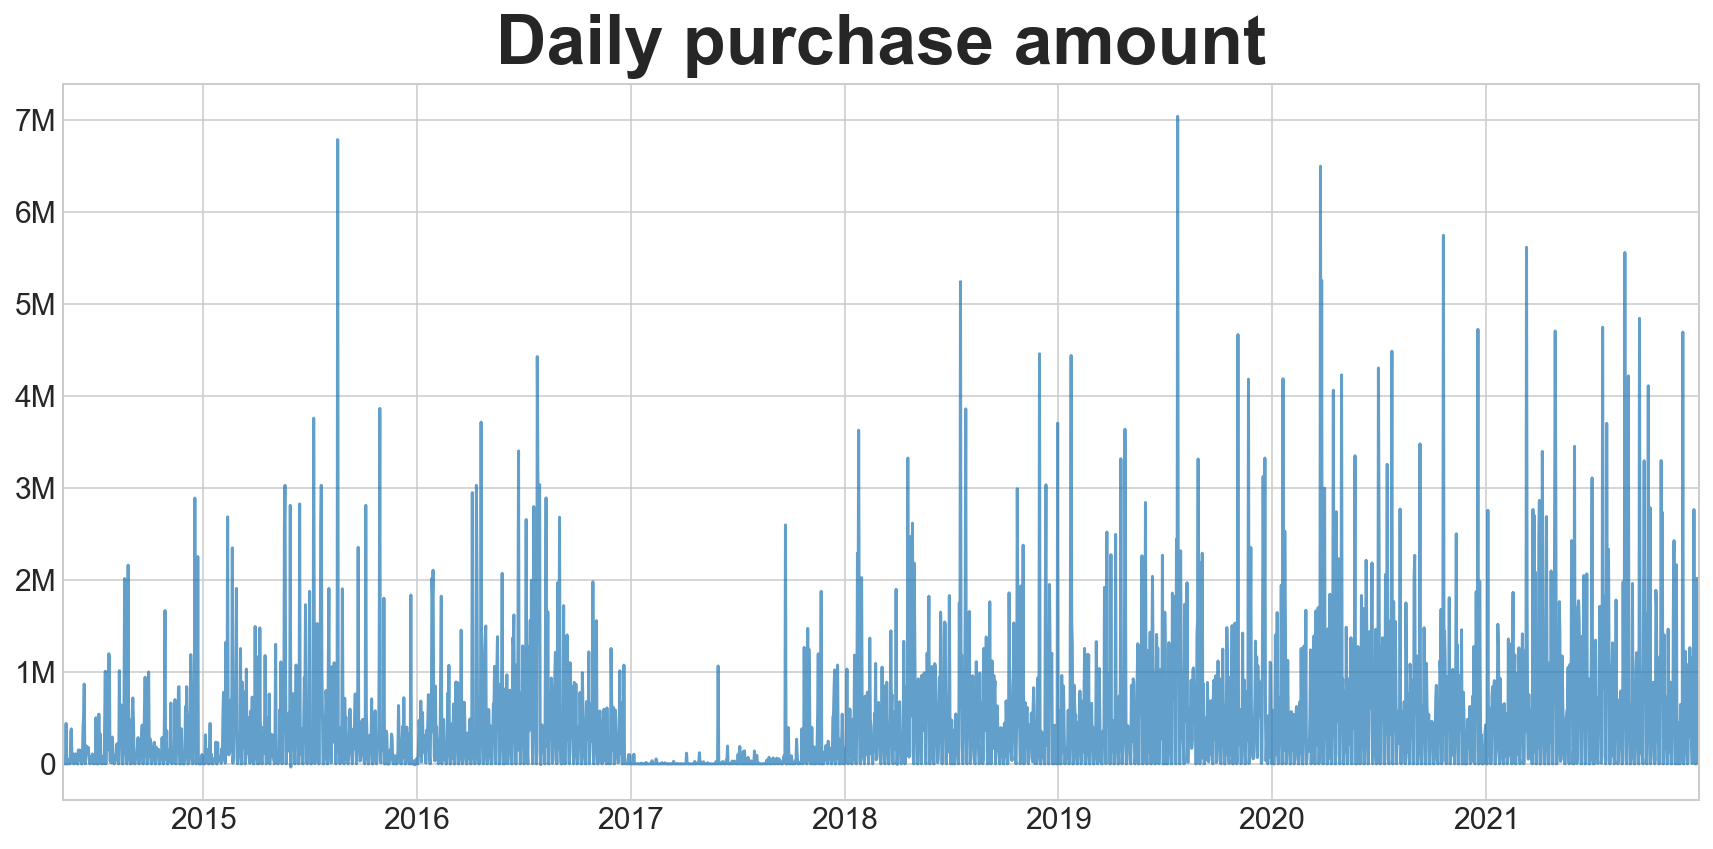

In [5]:
q1_show_ts()

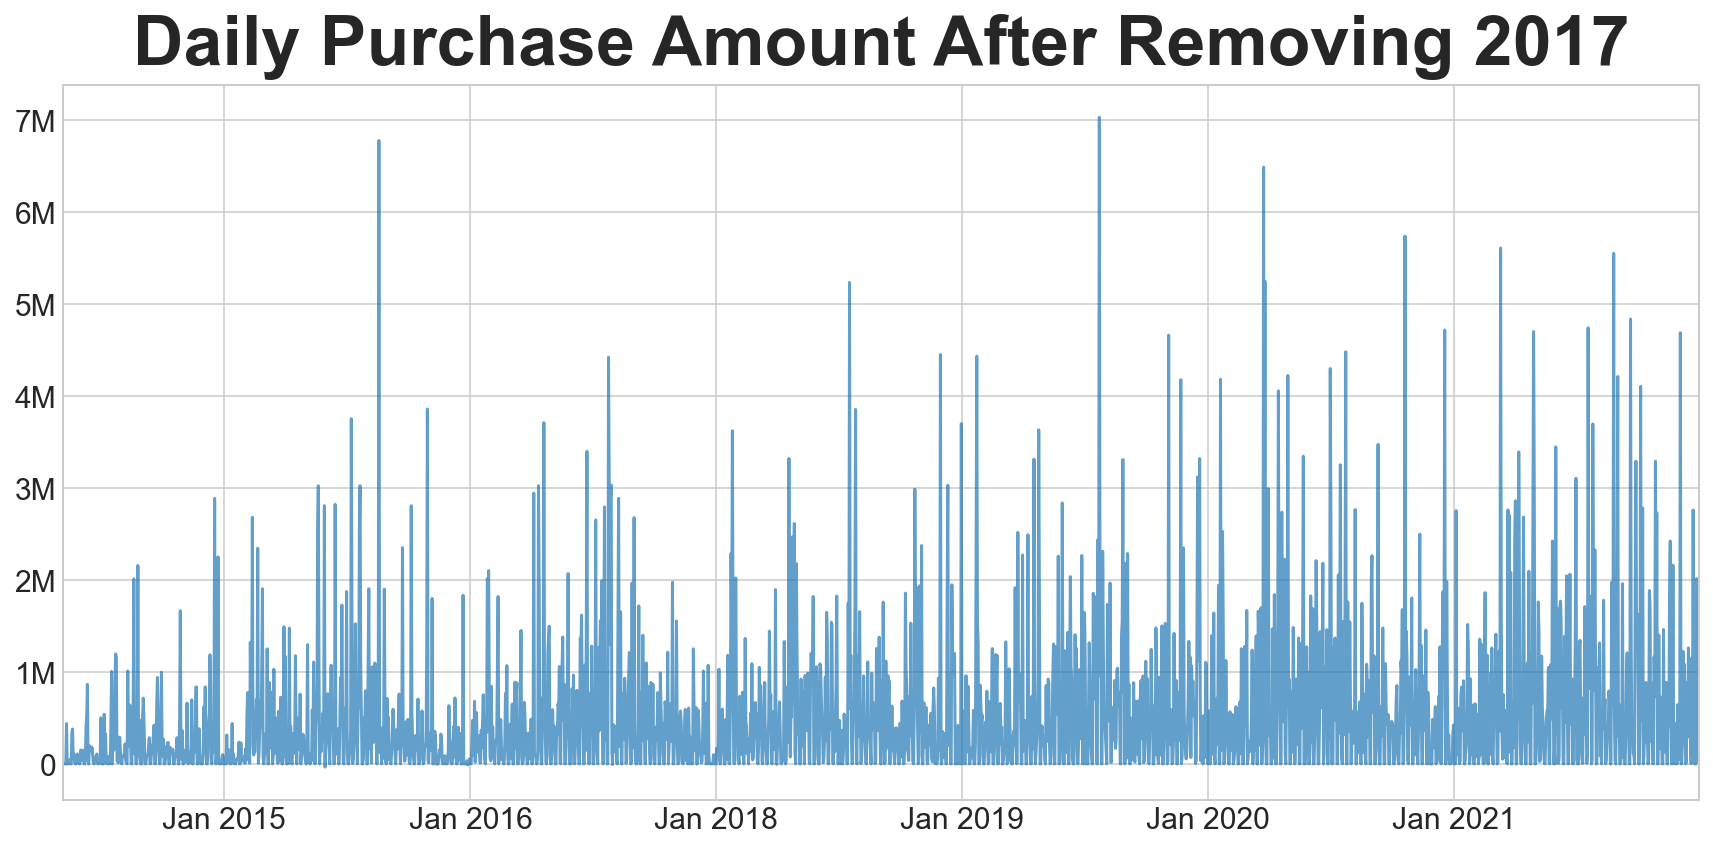

In [90]:
def q1_show_merged_ts():
    '''
    plots daily sales for the X_train
    '''
    #plt.figure(figsize=(12,6))

    # create a temp data frame that will include all data with problematic 2017
    fig, ax = plt.subplots(figsize=(12,6))
    ax = y_daily.plot(alpha=0.7)
    plt.title('Daily Purchase Amount After Removing 2017', fontsize=35, weight='bold')
    ax.set(yticks=[0, 1_000_000, 2_000_000, 3_000_000, 4_000_000, 5_000_000, 6_000_000, 7_000_000])
    ax.set(yticklabels=['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M'])
    ax.set(xticks=['2016', '2017', '2018', '2019', '2020', '2021'])
    ax.set(xticklabels=['Jan 2015', 'Jan 2016', 'Jan 2018', 'Jan 2019', 'Jan 2020', 'Jan 2021'])
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.show()
q1_show_merged_ts()

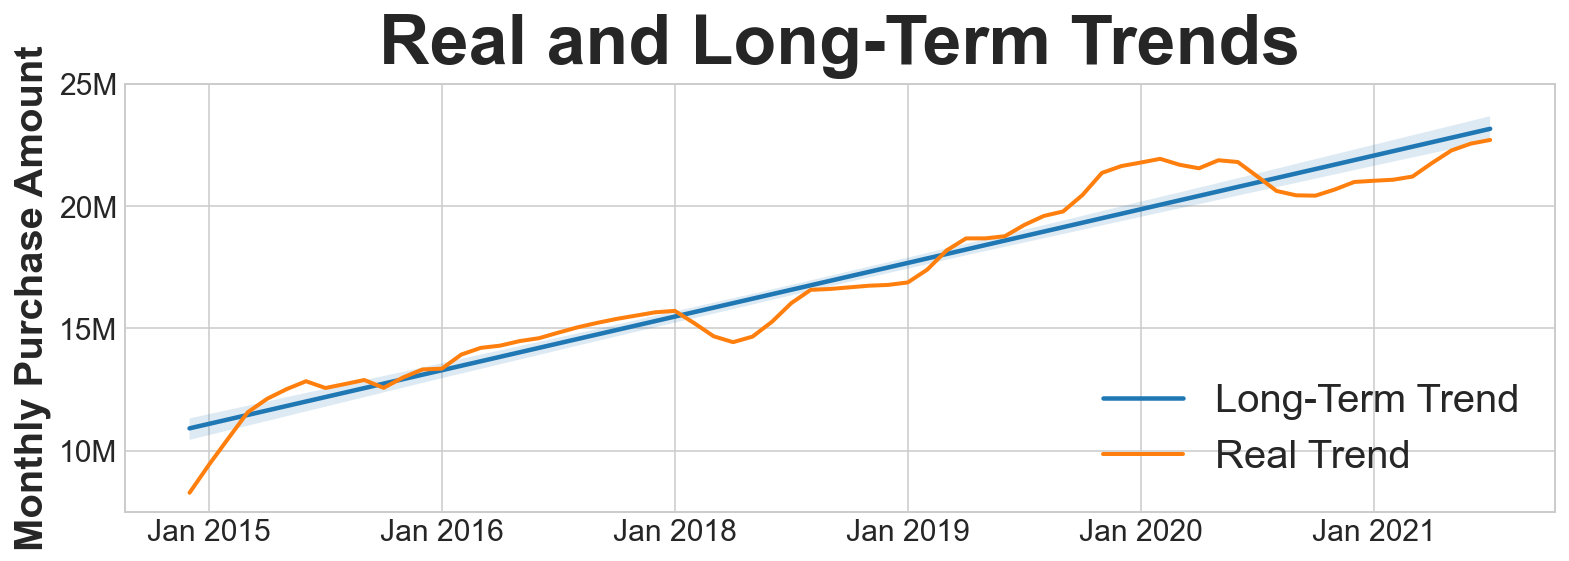

In [40]:
def viz_monthly_trend():
    '''
    Creates seasonal decomposition and plots the trend line of total monthly purchase amount
    '''

    ax = sns.regplot(y=decomposition_m.trend, x=decomposition_m.time_dummy, scatter=False, label='Long-Term Trend')
    ax = sns.lineplot(y=decomposition_m.trend, x=decomposition_m.time_dummy, lw=2, label='Real Trend')
    plt.title('Real and Long-Term Trends', fontsize=35)
    ax.set(yticks=[10_000_000, 15_000_000, 20_000_000, 25_000_000])
    ax.set(yticklabels=['10M', '15M', '20M', '25M'])
    ax.set(xticks=[7, 19, 31, 43, 55, 67])
    ax.set(xticklabels=['Jan 2015', 'Jan 2016', 'Jan 2018', 'Jan 2019', 'Jan 2020', 'Jan 2021'])
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel('Monthly Purchase Amount', fontsize = 20)
    plt.xlabel(None)
    plt.legend(loc='lower right', fontsize=20)
    plt.show()
viz_monthly_trend()

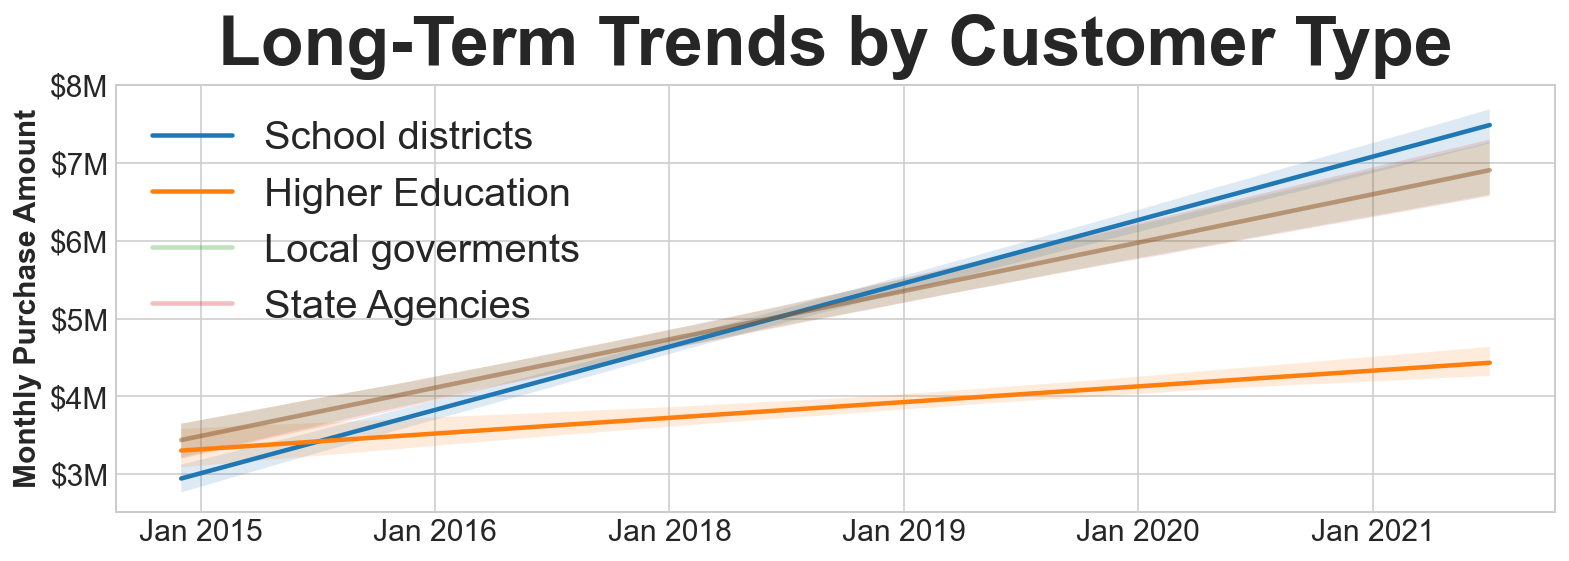

In [45]:
def show_all_trends():
    '''
    show monthly trends for all customer types except 'others'
    '''
    k12_trend = decomposition_k_12m.trend
    hedu_trend = decomposition_higher_ed_m.trend
    loc_gov_trend = decomposition_local_gov_m.trend
    state_agency_trend = decomposition_state_agency_m.trend
    
    overall_trend = decomposition_m.trend
    # create time dummies
    time_dummy = decomposition_m.time_dummy
    ax = sns.regplot(x=time_dummy, y=k12_trend, scatter=False, label='School districts')
    ax = sns.regplot(x=time_dummy, y=hedu_trend, scatter=False, label='Higher Education')
    ax = sns.regplot(x=time_dummy, y=loc_gov_trend, scatter=False, label='Local goverments', line_kws={'alpha':0.3})
    ax = sns.regplot(x=time_dummy, y=state_agency_trend, scatter=False, label='State Agencies', line_kws={'alpha':0.3})


    ax.set(xticks=[7, 19, 31, 43, 55, 67])
    ax.set(xticklabels=['Jan 2015', 'Jan 2016', 'Jan 2018', 'Jan 2019', 'Jan 2020', 'Jan 2021'])
    plt.xlabel(None)
    ax.set(yticks=[3_000_000, 4_000_000, 5_000_000, 6_000_000, 7_000_000, 8_000_000])
    ax.set(yticklabels=['$3M','$4M', '$5M', '$6M', '$7M', '$8M'])
    plt.ylabel('Monthly Purchase Amount', fontsize = 15)
    plt.legend(fontsize=20)
    plt.title('Long-Term Trends by Customer Type', fontsize=35)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.show()
show_all_trends()

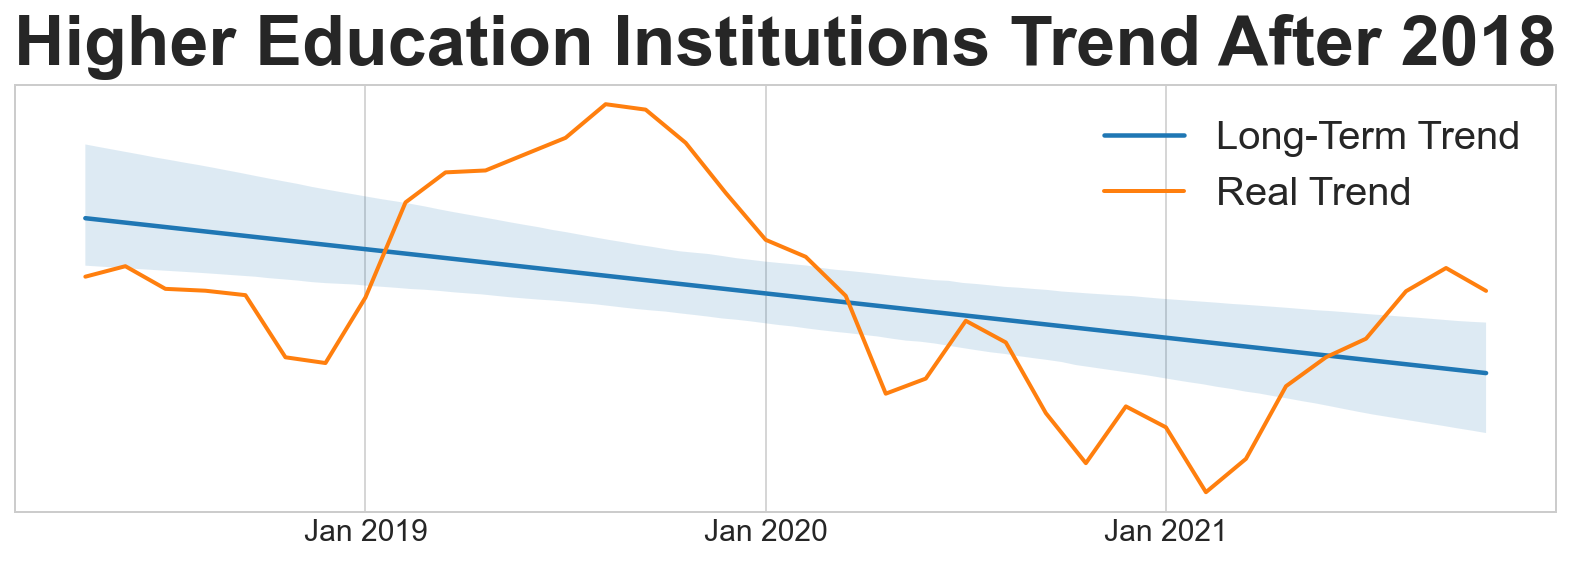

In [55]:
def show_hedu_trend2018():
    '''
    show trend for 2018 for higher education subtype
    '''
    decomposition_higher_ed_m2018['time_dummy'] = np.arange(len(decomposition_higher_ed_m2018.index))
    ax = sns.regplot(data=decomposition_higher_ed_m2018, x='time_dummy', y='trend',scatter=False, label='Long-Term Trend')
    ax = sns.lineplot(data=decomposition_higher_ed_m2018, x='time_dummy', y='trend', lw=2, label='Real Trend')
    plt.title('Higher Education Institutions Trend After 2018', fontsize=35)
    plt.xlabel(None)
    plt.ylabel(None)
    ax.set(xticks=[13, 23, 33])
    ax.set(xticklabels=['Jan 2019', 'Jan 2020', 'Jan 2021'])
    ax.set(yticks=[])
    plt.xticks(fontsize=15)
    plt.legend(fontsize=20)
    plt.show()
show_hedu_trend2018()

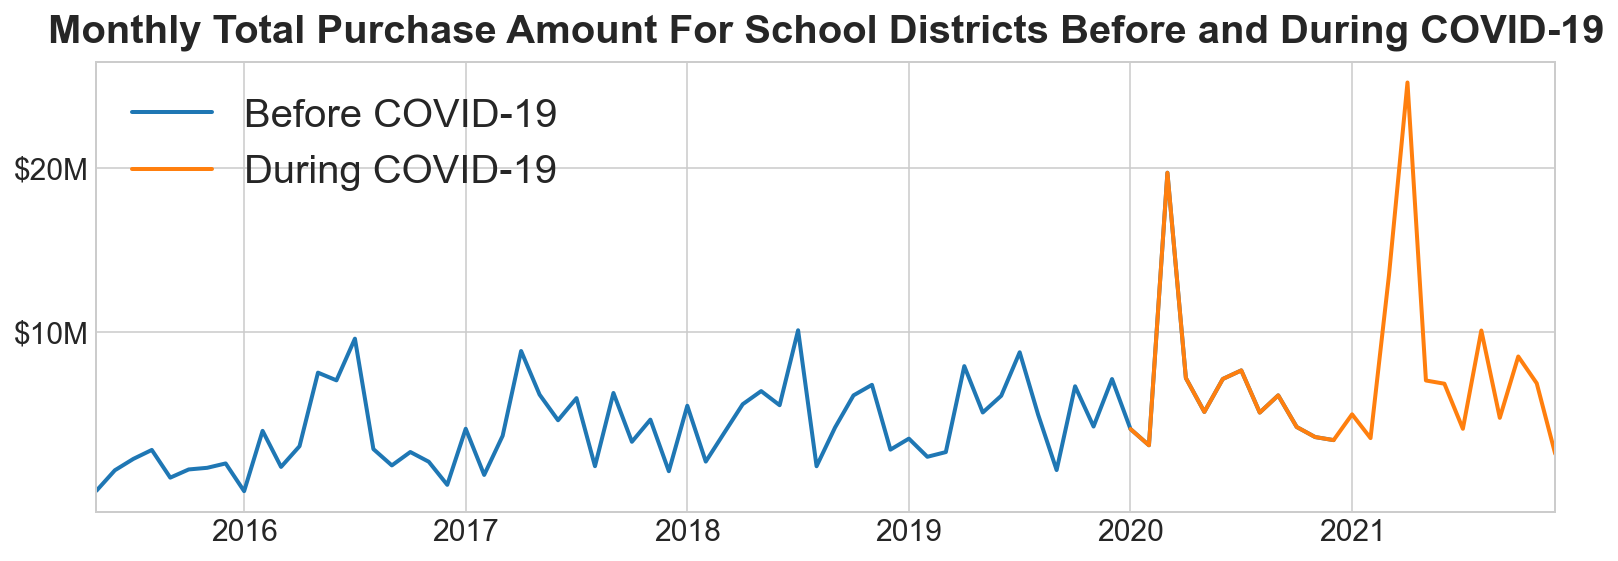

In [61]:
def viz_school_purchases():
    '''
    Creates a plot with 
    '''
    ax = k_12m.loc[:'2020'].plot(label='Before COVID-19', lw=2)
    ax = k_12m.loc['2020':].plot(label='During COVID-19', lw=2)
    plt.title('Monthly Total Purchase Amount For School Districts Before and During COVID-19', fontsize=20)
    ax.set(yticks=[10_000_000, 20_000_000])
    ax.set(yticklabels=['$10M', '$20M'])
    plt.legend(fontsize=20)
    plt.xlabel(None)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.show()
viz_school_purchases()

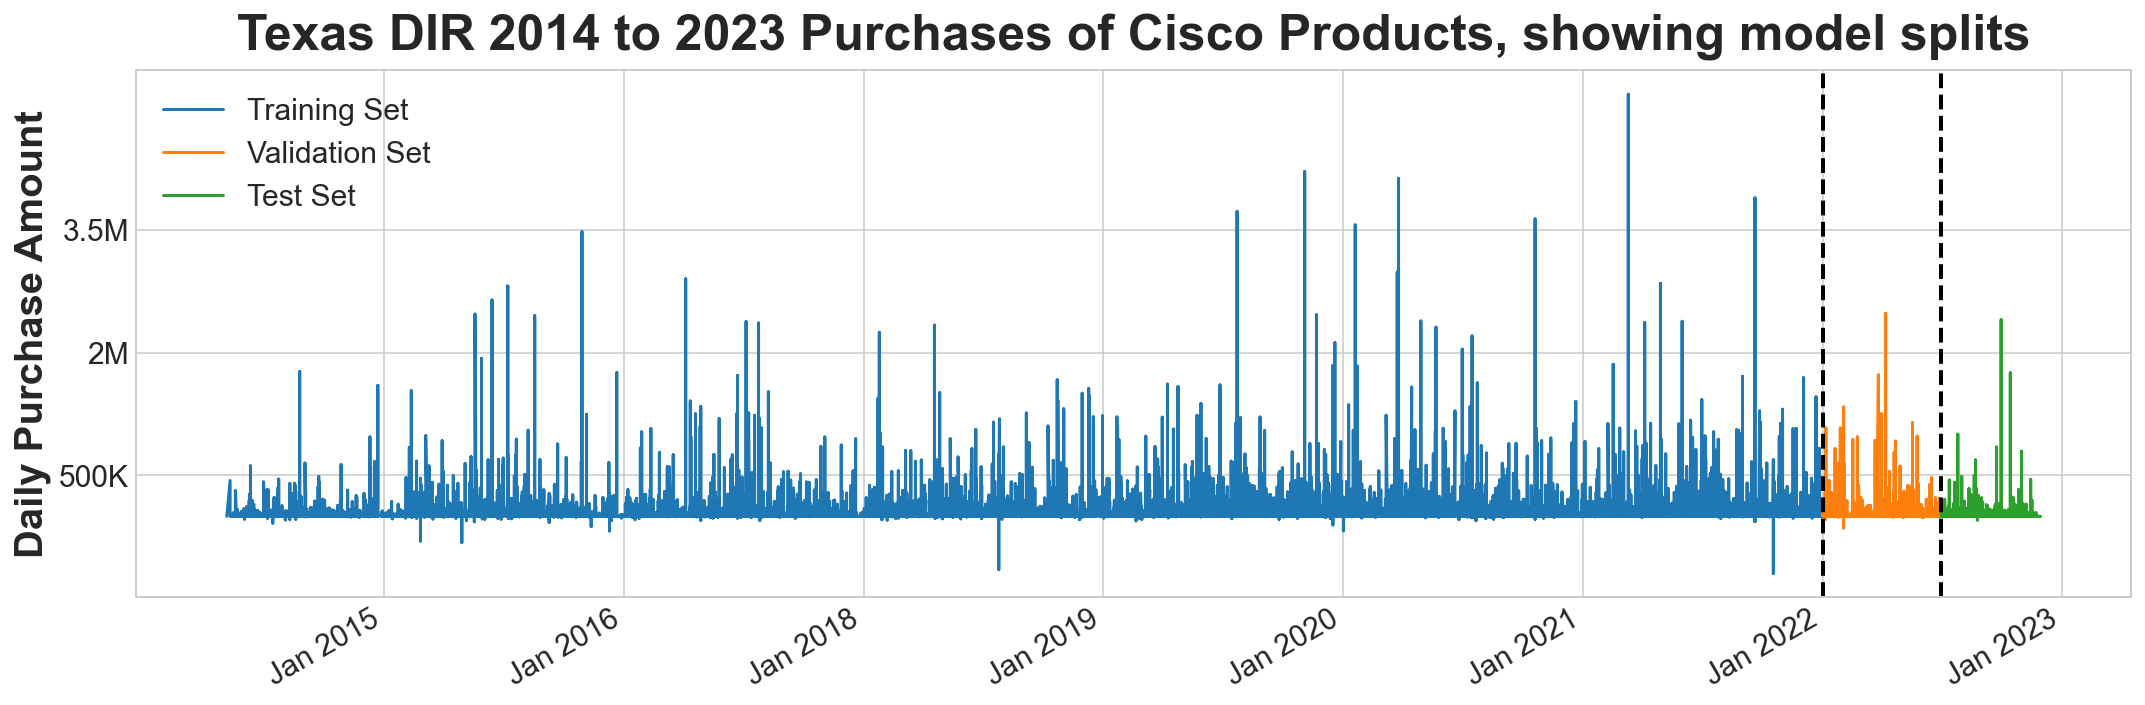

In [87]:
fix, ax = plt.subplots(figsize = (15,5))
train['purchase_amount'].plot(ax = ax, label='Training Set')
validate['purchase_amount'].plot(ax = ax, label='Validation Set')
test['purchase_amount'].plot(ax = ax, label='Test Set')
ax.axvline('01-01-22', color='black', ls='--', lw=2)
ax.axvline('07-01-22', color='black', ls='--', lw=2)
ax.legend(['Training Set', 'Validation Set', 'Test Set'], fontsize=15)
ax.set(xticks=['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
ax.set(xticklabels=['Jan 2015', 'Jan 2016', 'Jan 2018', 'Jan 2019', 'Jan 2020', 'Jan 2021', 'Jan 2022', 'Jan 2023'])
ax.set(yticks=[500_000,  2_000_000, 3_500_000])
ax.set(yticklabels=['500K',  '2M','3.5M'])
#ax.set(ylabel='Purchase Amount') 
ax.set(xlabel=None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Texas DIR 2014 to 2023 Purchases of Cisco Products, showing model splits', fontsize=25)
plt.ylabel('Daily Purchase Amount',  fontsize = 20)

plt.show()